##Import modul yang dibutuhkan kemudian masukan code untuk menentukan data yang terdapat pada soal

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NPM = 2006572913
data = {'NPM': np.random.randint(NPM-10000,NPM+10000,1000),
        'Nilai UTS': np.random.binomial(100,0.7,1000),
        'Nilai UAS': np.random.binomial(100,0.3,1000),
        'Nilai Tugas': np.random.normal(80,10,1000),
        'Kelas': 250*['A','B','C','D']}

df = pd.DataFrame(data)
df

,NPM,Nilai UTS,Nilai UAS,Nilai Tugas,Kelas
0,2006579135,74,34,77.498476,A
1,2006569638,75,34,94.832276,B
2,2006574947,70,34,76.895431,C
3,2006580151,73,22,84.446260,D
4,2006577175,62,40,85.817548,A
...,...,...,...,...,...
995,2006581230,70,37,77.629842,D
996,2006572065,76,25,69.508886,A
997,2006570470,73,36,81.992458,B
998,2006579772,69,36,74.775040,C


##Gunakan rumus ini untuk menentukan bobot yang sesuai pada soal yang kemudian akan ditambahkan ke kolom baru

In [ ]:
df['Nilai Akhir'] = df['Nilai UTS']*0.35+df['Nilai UAS']*0.4+df['Nilai Tugas']*0.25 
df

,NPM,Nilai UTS,Nilai UAS,Nilai Tugas,Kelas,Nilai Akhir
0,2006579135,74,34,77.498476,A,58.874619
1,2006569638,75,34,94.832276,B,63.558069
2,2006574947,70,34,76.895431,C,57.323858
3,2006580151,73,22,84.446260,D,55.461565
4,2006577175,62,40,85.817548,A,59.154387
...,...,...,...,...,...,...
995,2006581230,70,37,77.629842,D,58.707461
996,2006572065,76,25,69.508886,A,53.977222
997,2006570470,73,36,81.992458,B,60.448115
998,2006579772,69,36,74.775040,C,57.243760


##Gunakan suatu condisi menggunakan np.select(conlist,choicelist, default=0) untuk menentukan nilai huruf yang diberikan syarat pada soal

In [ ]:
Conlist = [(df['Nilai Akhir']>=85), 
           (df['Nilai Akhir']<85)&(df['Nilai Akhir']>=75),
           (df['Nilai Akhir']<75)&(df['Nilai Akhir']>=65),
           (df['Nilai Akhir']<65)&(df['Nilai Akhir']>=55),
           (df['Nilai Akhir']<55)]
Choicelist = ['A','B','C','D','E']
df['Nilai Huruf'] = np.select(Conlist,Choicelist)
df

,NPM,Nilai UTS,Nilai UAS,Nilai Tugas,Kelas,Nilai Akhir,Nilai Huruf
0,2006579135,74,34,77.498476,A,58.874619,D
1,2006569638,75,34,94.832276,B,63.558069,D
2,2006574947,70,34,76.895431,C,57.323858,D
3,2006580151,73,22,84.446260,D,55.461565,D
4,2006577175,62,40,85.817548,A,59.154387,D
...,...,...,...,...,...,...,...
995,2006581230,70,37,77.629842,D,58.707461,D
996,2006572065,76,25,69.508886,A,53.977222,E
997,2006570470,73,36,81.992458,B,60.448115,D
998,2006579772,69,36,74.775040,C,57.243760,D


##Hapus kolom NPM untuk mencari suatu insight pada tiap jenis nilai

In [ ]:
nilai_only = df.drop(['NPM'], axis=1) 
nilai_only

,Nilai UTS,Nilai UAS,Nilai Tugas,Kelas,Nilai Akhir,Nilai Huruf
0,74,34,77.498476,A,58.874619,D
1,75,34,94.832276,B,63.558069,D
2,70,34,76.895431,C,57.323858,D
3,73,22,84.446260,D,55.461565,D
4,62,40,85.817548,A,59.154387,D
...,...,...,...,...,...,...
995,70,37,77.629842,D,58.707461,D
996,76,25,69.508886,A,53.977222,E
997,73,36,81.992458,B,60.448115,D
998,69,36,74.775040,C,57.243760,D


##Pilih seluruh data yang berupa numeric untuk dilihat jumlah tiap orang yang mendapatkan nilai tertentu pada tiap jenis nilai. Kemudian visualisasikan dengan histogram

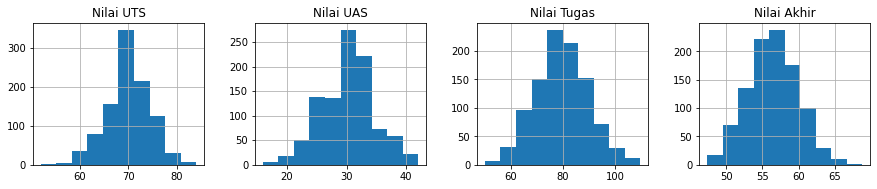

In [ ]:
numerical = nilai_only.select_dtypes(include = ['int64','float64']).columns 

nilai_only[numerical].hist(figsize=(15, 6), layout=(2, 4));

##Grup data tersebut berdasarkan huruf yang kemudian diikuti dengan kelas. Gunakan mean untuk mencari rata rata nilai huruf dari tiap kelas

In [ ]:
nilai = nilai_only.groupby(['Nilai Huruf','Kelas']).mean() 
nilai

Nilai UTS  Nilai UAS  Nilai Tugas  Nilai Akhir
Nilai Huruf Kelas                                                
C           A      75.333333  38.666667    93.588506    65.230460
            B      75.500000  33.500000   102.870563    65.542641
            C      72.000000  41.000000   108.553906    68.738476
            D      71.666667  34.333333   107.020726    65.571848
D           A      70.970414  31.497041    83.154640    58.227122
            B      71.069182  30.710692    83.611319    58.061320
            C      71.313609  31.508876    82.903521    58.289194
            D      70.776316  31.697368    83.839646    58.410570
E           A      67.461538  27.333333    72.752050    52.732884
            B      67.528090  28.269663    72.290343    53.015282
            C      68.475000  27.500000    70.477921    52.585730
            D      67.631579  27.178947    72.382262    52.638197

##Gunakan heatmap untuk memvisualisasikan rata rata tiap nilai huruf pada tiap kelas

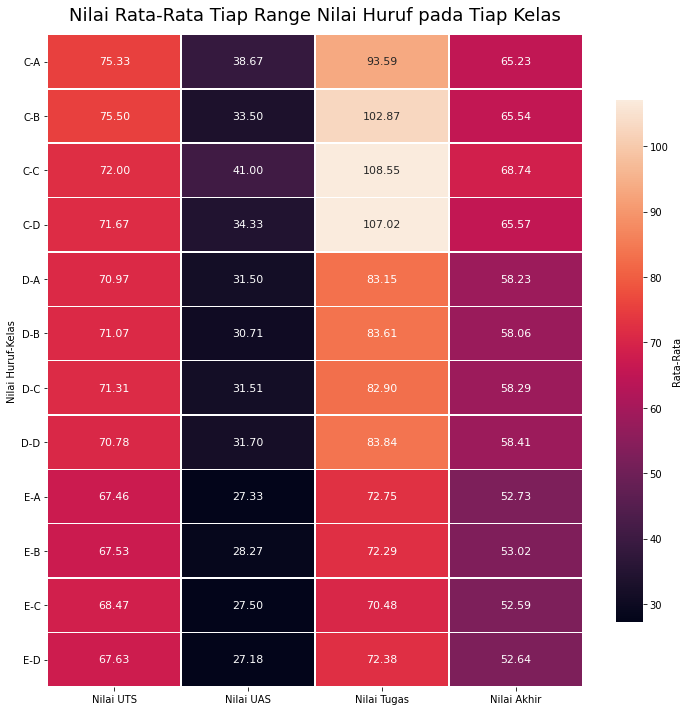

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(nilai, robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Rata-Rata'}, ax=ax)                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Nilai Rata-Rata Tiap Range Nilai Huruf pada Tiap Kelas', fontdict={'fontsize':18},    pad=14);

plt.show()

##Hapus nilai yang tidak dibutuhkan seperti tugas, UTS, dan UAS. Kemudian, kelompokkan berdasarkan nilai huruf yang diikuti dengan .count() untuk menjumlahkan datanya sesuai pada soal.

In [ ]:
nilai_kelas = nilai_only.drop(['Nilai UTS','Nilai UAS','Nilai Tugas'], axis=1)
jumlah = nilai_kelas.groupby(['Nilai Huruf','Kelas']).count()
jumlah

Nilai Akhir
Nilai Huruf Kelas             
C           A                3
            B                2
            C                1
            D                3
D           A              169
            B              159
            C              169
            D              152
E           A               78
            B               89
            C               80
            D               95

##Lakukan countplot untuk melihat data terbanyak atau terkecil dari suatu nilai huruf pada suatu kelas

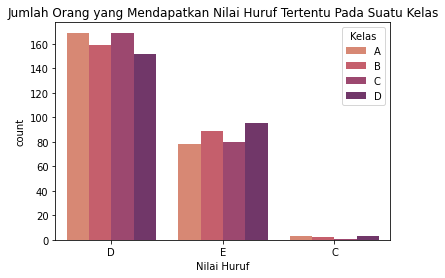

In [ ]:
sns.countplot(x="Nilai Huruf", hue="Kelas", data=nilai_kelas, palette='flare');
plt.title('Jumlah Orang yang Mendapatkan Nilai Huruf Tertentu Pada Suatu Kelas')
plt.show()

##Gunakan heatmap untuk memperjelas angkanya dari visualisasi countplotnya

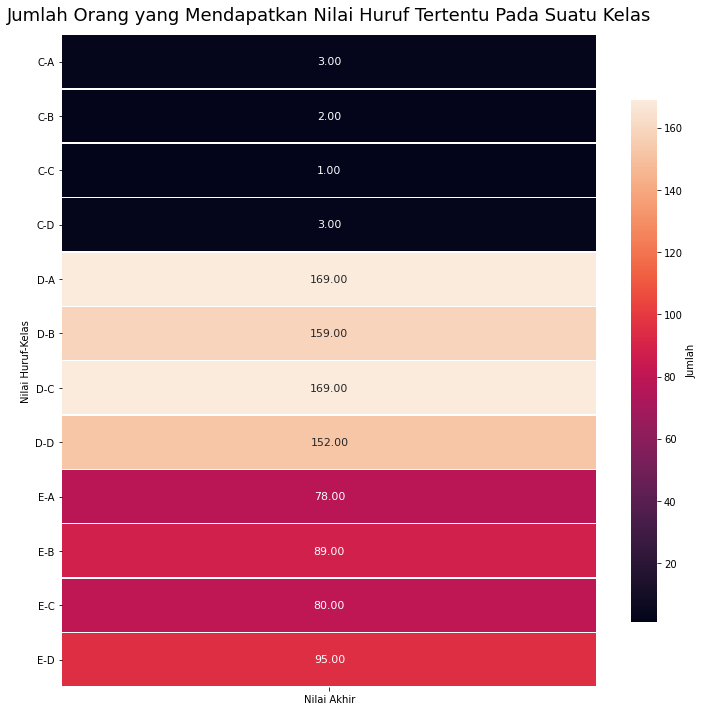

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(jumlah, robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Jumlah'}, ax=ax)                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Jumlah Orang yang Mendapatkan Nilai Huruf Tertentu Pada Suatu Kelas', fontdict={'fontsize':18},    pad=14);

plt.show()